In [3]:
pip install pandas openpyxl

Note: you may need to restart the kernel to use updated packages.


In [4]:
import glob
import os

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
np.random.seed(543251) # control random seed

import copia.utils as u
from copia.richness import *
from copia.hill import hill_numbers
from copia.utils import survival_ratio
from copia.utils import evenness
from copia.plot import accumulation_curve
from copia.plot import multi_kde
from copia.plot import survival_errorbar
from copia.plot import evenness_plot
from copia.plot import density
from copia.plot import hill_plot

In [5]:
import pandas as pd

fando = ['sw','st','mv','dc','hp']
fpath = ['star wars','star trek','marvel','DCU','harry potter']
fandoms = {}

for i, f in enumerate(fando):
    records = []
    # 读取Excel文件
    file_path = fpath[i] + '.xlsx'
    df = pd.read_excel(file_path)

    # 假设列名为'work id', 'fandom', 'all kudos'
    # 分割' all kudos ' 列中用户并创建 (user, work id) 的记录
    

    for index, row in df.iterrows():
        work_id = row['work_id']
        all_kudos = row['all_kudos']
        users = all_kudos.split(', ')  # 假设用户用逗号加空格分隔
        for user in users:
            wid_fdm = str(work_id)
            records.append((user, wid_fdm,f))

    # 创建一个新的DataFrame来存储这些记录
    fandoms[f] = pd.DataFrame(records, columns=['user', 'work_id','fandom'])

stats = []
for lit, df in fandoms.items():
    abundance = u.to_abundance(df['user'])
    s = u.basic_stats(abundance)
    d = {'fandom': lit}
    for k in ('f1', 'f2', 'S', 'n'):
        d[k] = s[k]
    d['repo'] = len(set(df['work_id']))
    stats.append(d)

stats


[{'fandom': 'sw',
  'f1': 14414,
  'f2': 3667,
  'S': 22903,
  'n': 51000,
  'repo': 1020},
 {'fandom': 'st',
  'f1': 10346,
  'f2': 2839,
  'S': 17662,
  'n': 50722,
  'repo': 1020},
 {'fandom': 'mv',
  'f1': 17191,
  'f2': 4042,
  'S': 25589,
  'n': 50000,
  'repo': 1000},
 {'fandom': 'dc',
  'f1': 13211,
  'f2': 3799,
  'S': 22155,
  'n': 51000,
  'repo': 1020},
 {'fandom': 'hp',
  'f1': 21575,
  'f2': 4930,
  'S': 30966,
  'n': 53000,
  'repo': 1060}]

In [6]:
stats_df = pd.DataFrame(stats)
stats_df['fandom'] = stats_df['fandom'].str.lower()
stats_df.loc[len(stats_df)] = ['all'] + list(stats_df[['f1', 'f2', 'S', 'n']].sum()) + [None]
stats_df = stats_df.set_index('fandom')
stats_df

,f1,f2,S,n,repo
fandom,,,,,
sw,14414,3667,22903,51000,1020
st,10346,2839,17662,50722,1020
mv,17191,4042,25589,50000,1000
dc,13211,3799,22155,51000,1020
hp,21575,4930,30966,53000,1060
all,76737,19277,119275,255722,None


Table saved as image to /Users/mykilee/Desktop/fandom_stats_grey_pink.png


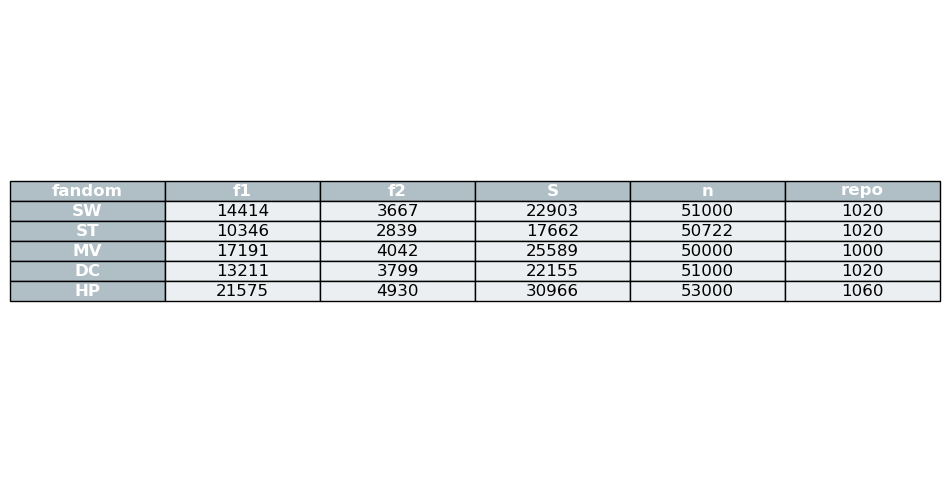

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# 创建 DataFrame
stats = [
    {'fandom': 'sw', 'f1': 14414, 'f2': 3667, 'S': 22903, 'n': 51000, 'repo': 1020},
    {'fandom': 'st', 'f1': 10346, 'f2': 2839, 'S': 17662, 'n': 50722, 'repo': 1020},
    {'fandom': 'mv', 'f1': 17191, 'f2': 4042, 'S': 25589, 'n': 50000, 'repo': 1000},
    {'fandom': 'dc', 'f1': 13211, 'f2': 3799, 'S': 22155, 'n': 51000, 'repo': 1020},
    {'fandom': 'hp', 'f1': 21575, 'f2': 4930, 'S': 30966, 'n': 53000, 'repo': 1060}
]

# 转换为 DataFrame
stats_df = pd.DataFrame(stats)
stats_df['fandom'] = stats_df['fandom'].str.upper()  # 将 fandom 字段大写以匹配表头
stats_df = stats_df.set_index('fandom')  # 将 fandom 设为索引

# 在 DataFrame 中添加标题行和列
stats_df.columns.name = "Fandom"
stats_df = stats_df.reset_index()

# 绘制表格
fig, ax = plt.subplots(figsize=(10, 6))  # 可以调整figsize参数以改变图片大小
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=stats_df.values, colLabels=stats_df.columns, cellLoc='center', loc='center')

# 设置表格颜色为灰粉色系列
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)

for (i, j), cell in table.get_celld().items():
    if i == 0 or j == 0:
        cell.set_text_props(weight='bold', color='white')
        cell.set_facecolor('#B0BEC5')  # 灰粉色
    else:
        cell.set_facecolor('#ECEFF1')  # 浅灰粉色

# 获取桌面路径
desktop_path = os.path.join(os.path.expanduser('~'), 'Desktop')

# 保存图片到桌面
output_path = os.path.join(desktop_path, 'fandom_stats_grey_pink.png')
plt.savefig(output_path, bbox_inches='tight', dpi=300)

# 显示保存路径
print(f"Table saved as image to {output_path}")